In [4]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Description and Data Cleaning

In [5]:
heart_data = pd.read_csv('C:/Users/kryst/OneDrive/Documents/Fall 1st/BIS 634/BIS_634_HW/final project/heart_disease.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
heart_data.shape

(918, 12)

In [7]:
heart_data.size

11016

In [8]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# description of data 
# also can determine if any missing values 
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Note: "FastingBS" is in fact categorical data but assigned with dummy values. "FastingBS" only have two categories: 1: if FastingBS > 120 mg/dl, 0: otherwise

In [10]:
# determine if any duplication
heart_data.duplicated().sum()

0

In [11]:
# Replace dummy values with oringinal meaning
heart_data['HeartDisease'].replace({1:'Yes', 0:'No'}, inplace=True) 
heart_data['ExerciseAngina'].replace({'Y':'Yes', 'N':'No'}, inplace=True)
heart_data['FastingBS'].replace({1: '> 120 mg/dl', 0: 'Normal'}, inplace=True)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,Normal,172,No,0.0,Up,No
1,49,F,NAP,160,180,Normal,Normal,156,No,1.0,Flat,Yes
2,37,M,ATA,130,283,Normal,ST,98,No,0.0,Up,No
3,48,F,ASY,138,214,Normal,Normal,108,Yes,1.5,Flat,Yes
4,54,M,NAP,150,195,Normal,Normal,122,No,0.0,Up,No


In [12]:
# Description of data in plotly table
fig = go.Figure(data=[go.Table(
                                 header=dict(
                                              values=list(heart_data.columns), # header values
                                              line_color='black', # line Color of header 
                                              fill_color='pink', # background color of header
                                              align='center', # align header at center
                                              height=40, # height of Header
                                              font=dict(color='white', size=10), # font size & color of header text
                                             ), cells=dict(values=[
                                                     heart_data.Age , # cclumn values
                                                     heart_data.Sex, 
                                                     heart_data.ChestPainType,
                                                     heart_data.RestingBP, 
                                                     heart_data.Cholesterol,
                                                     heart_data.FastingBS,
                                                     heart_data.RestingECG,
                                                     heart_data.MaxHR,
                                                     heart_data.ExerciseAngina,
                                                     heart_data.Oldpeak,
                                                     heart_data.ST_Slope,
                                                     heart_data.HeartDisease
                                                    ],line_color='black', # line color of the cell
                                            fill_color='lightblue', # color of the cell
                                            align='left'  # align text to left in cell
                                           )
                               )
                     ]
               )

fig.update_layout(width=1000, height=500)
#import plotly.io
#import json
#print(json.loads(plotly.io.to_json(fig))['data'][0].keys())
fig.show()

Exploratory Analysis 

A. Summary statistics 

In [13]:
heart_data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [14]:
heart_data[heart_data['HeartDisease']=='No'].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000


In [15]:
heart_data[heart_data['HeartDisease']=='Yes'].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000


Numerical attributes 

In [16]:
# count outliers 
def count_outliers(col):
        q1 = heart_data[col].quantile(0.25,interpolation='nearest')
        q2 = heart_data[col].quantile(0.5,interpolation='nearest')
        q3 = heart_data[col].quantile(0.75,interpolation='nearest')
        q4 = heart_data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        lower=0
        upper=0
        lower = q1 - 1.5*IQR
        upper = q3 + 1.5*IQR
        if heart_data[col].min() > lower and heart_data[col].max() < upper:
            print("No outliers in",col)
        else:
            print("There are outliers in",col)
            x = heart_data[heart_data[col]<lower][col].size
            y = heart_data[heart_data[col]>upper][col].size
            a.append(col)
            print('Count of outliers are:',x+y)
a=0
a = []

numeric_col=[col for col in heart_data if heart_data[col].dtype !="object" ]
for col in numeric_col:
    count_outliers(col)

No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16


In [17]:
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

heart_data[numeric_col].iplot(kind='histogram',subplots=True)

In [18]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    df = df[~((df[numeric_col] < (lower)) |(df[numeric_col] > (upper))).any(axis=1)]
    return df
heart_data = remove_outliers(heart_data)
heart_data.shape

(702, 12)

In [19]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,Normal,172,No,0.0,Up,No
1,49,F,NAP,160,180,Normal,Normal,156,No,1.0,Flat,Yes
2,37,M,ATA,130,283,Normal,ST,98,No,0.0,Up,No
3,48,F,ASY,138,214,Normal,Normal,108,Yes,1.5,Flat,Yes
4,54,M,NAP,150,195,Normal,Normal,122,No,0.0,Up,No


In [20]:
# after removing outliers 
heart_data[numeric_col].iplot(kind='histogram',subplots=True)

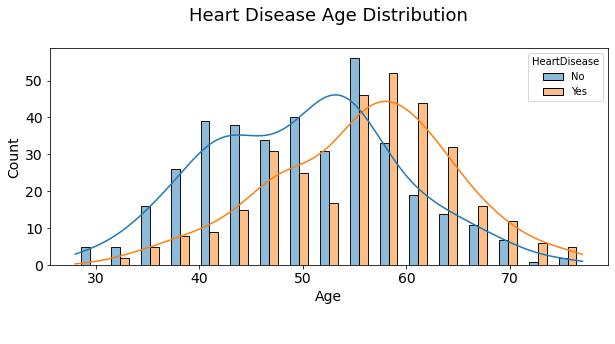

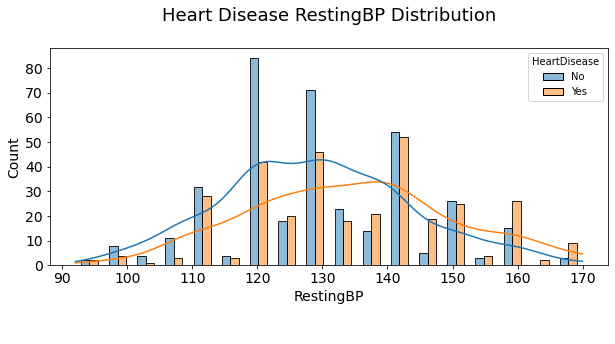

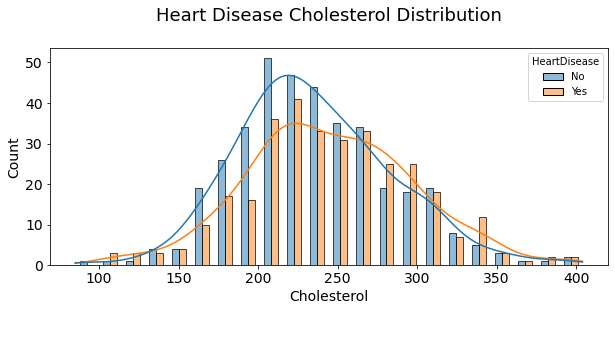

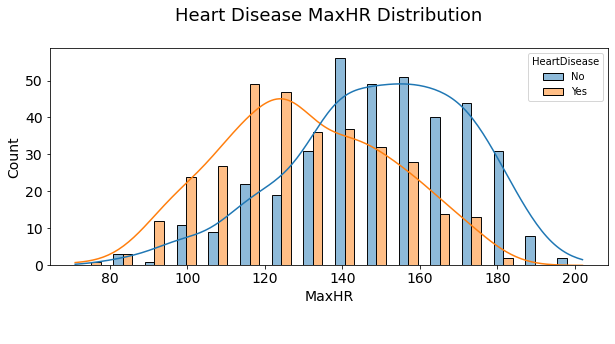

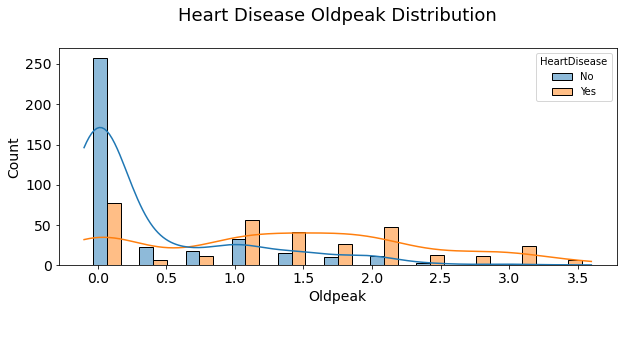

In [21]:
for col in numeric_col:
    plt.figure(figsize=(10,4))
    plt.title(f'Heart Disease {col} Distribution\n', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(f'{col}\n\n', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    sns.histplot(data=heart_data, x=col, hue='HeartDisease',multiple='dodge', shrink=0.6, kde=True)

Categorical attributes

In [22]:
def plot_catogorical(col_name): 
        colors = px.colors.cyclical.Twilight
        fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Counts',
                                        'Percentages'),
                        specs=[[{"type": "xy"},
                                {'type':'domain'}]])
        fig.add_trace(go.Bar(y = heart_data[col_name].value_counts().values.tolist(), 
                        x = heart_data[col_name].value_counts().index, 
                        text=heart_data[col_name].value_counts().values.tolist(),
                textfont=dict(size=15),
                        textposition = 'outside',
                        showlegend=False,
                marker = dict(color = colors,
                                line_color = 'black',
                                line_width=3)),row = 1,col = 1)
        fig.add_trace((go.Pie(labels=heart_data[col_name].value_counts().keys(),
                                values=heart_data[col_name].value_counts().values,textfont = dict(size = 16),
                        hole = .4,
                        marker=dict(colors=colors),
                        textinfo='label+percent',
                        hoverinfo='label')), row = 1, col = 2)
        fig.update_yaxes(range=[0,1000])
        fig.update_layout(
                        title=dict(text = f"{col_name} Distribution",x=0.5,y=0.95),
                        title_font_size=30
                        )
        iplot(fig)     

In [23]:
categorical_col=[col for col in heart_data if heart_data[col].dtype=="object" ]
for col in categorical_col:
    plot_catogorical(col)

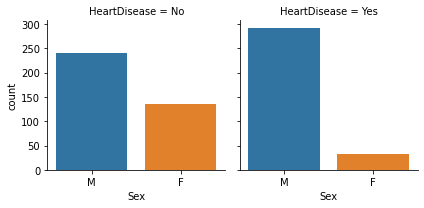

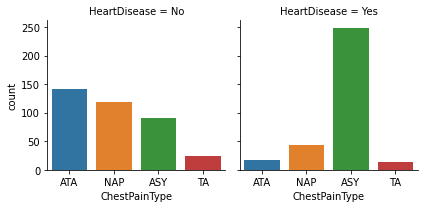

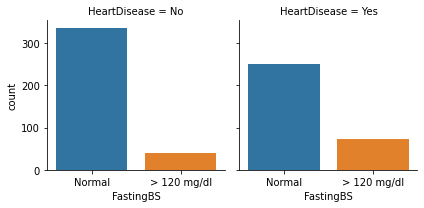

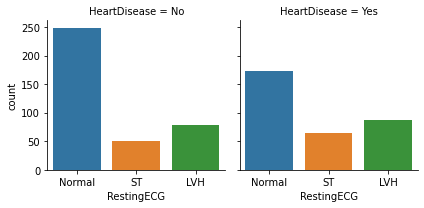

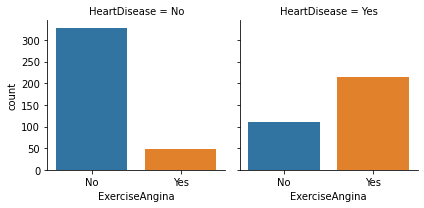

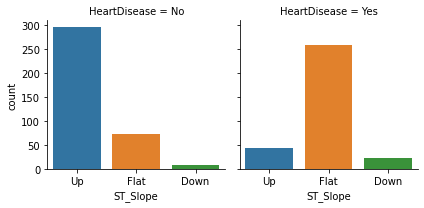

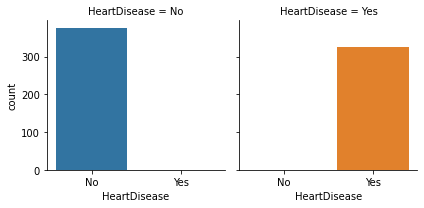

In [24]:
for col in categorical_col:
    sns.catplot(x=col, data=heart_data, col='HeartDisease', kind='count', height=3)

B. Numerical/Categorical Attributes Analysis

In [25]:
# Using facet_row and or facet_col arguments to create Sub plots
def facet_plot(y,fac_col):
   fig = px.scatter(heart_data, 
                  x=heart_data['Age'], 
                  y=heart_data[y], 
                  color=heart_data['HeartDisease'], 
                  facet_col=heart_data[fac_col],
                  facet_row=heart_data['Sex'],
                  color_discrete_map={1: "#FF5722",0: "#7CB342"},
                  width=950, 
                  height=800,
                  title=f"Relationship between Age and {y} by {fac_col} and Gender")

   fig.update_layout(
                     plot_bgcolor= "#dcedc1",
                     paper_bgcolor="#FFFDE7",
                  )
   fig.show()

In [26]:
for y in ['RestingBP','Cholesterol']:
    for fac_col in ['ChestPainType','FastingBS']:
        facet_plot(y,fac_col)

In [27]:
# encode the categorical variables 
def label_endocing(col_name):
    label_encoder = preprocessing.LabelEncoder()
    heart_data[col_name]= label_encoder.fit_transform(heart_data[col_name])
    heart_data[col_name].unique()

for col in categorical_col:
    label_endocing(col)

In [28]:
heart_data['HeartDisease'].replace({'Yes':1, 'No':0}, inplace=True) # apply dummy variables for correlation analysis 
heart_data_corr = heart_data.corr()
fig = px.imshow(heart_data_corr)
fig.update_layout(
    title='12 attributes correlation',
    width=600,
    height=600,
)
fig.show()

Data Preprocessing and Feature Scaling 

In [29]:
# encode the categorical variables 
def label_endocing(col_name):
    label_encoder = preprocessing.LabelEncoder()
    heart_data[col_name]= label_encoder.fit_transform(heart_data[col_name])
    heart_data[col_name].unique()

In [30]:
for col in categorical_col:
    label_endocing(col)

In [50]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,1,1,172,0,0.0,2,0
1,49,0,2,160,180,1,1,156,0,1.0,1,1
2,37,1,1,130,283,1,2,98,0,0.0,2,0
3,48,0,0,138,214,1,1,108,1,1.5,1,1
4,54,1,2,150,195,1,1,122,0,0.0,2,0


In [32]:
scaler = StandardScaler()
scaler.fit(heart_data.drop('HeartDisease',axis = 1))

StandardScaler()

In [33]:
scaled_features = scaler.transform(heart_data.drop('HeartDisease',axis = 1))
feature_df = pd.DataFrame(scaled_features,columns = heart_data.columns[:-1])
X = feature_df
y = heart_data['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.335169,0.560898,0.147121,0.547914,0.973199,0.440315,0.113502,1.291925,-0.774008,-0.866393,0.971639
1,-0.390639,-1.782855,1.190340,1.845825,-1.178909,0.440315,0.113502,0.634669,-0.774008,0.176309,-0.750812
2,-1.650013,0.560898,0.147121,-0.101041,0.854735,0.440315,1.707064,-1.747885,-0.774008,-0.866393,0.971639
3,-0.495587,-1.782855,-0.896099,0.418123,-0.507609,0.440315,0.113502,-1.337100,1.291976,0.697660,-0.750812
4,0.134100,0.560898,1.190340,1.196870,-0.882748,0.440315,0.113502,-0.762001,-0.774008,-0.866393,0.971639


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

KNN algorithm 

In [35]:
def knn_model(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print(f"When k = {k}:")
    cmat = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(cmat, columns = ['No Heart Disease', 'Heart Disease'], index=['No Heart Disease', 'Heart Disease'])
    TN =cm_df.iloc[0, 0]
    FP = cm_df.iloc[0, 1]
    FN = cm_df.iloc[1, 0]
    TP = cm_df.iloc[1, 1]
    accuracy = round((TP + TN) / (TP + FP + TN + FN) * 100, 2)
    sensitivity = round(TP / (TP + FN) * 100, 2)
    specificity = round(TN / (TN + FP) * 100, 2)
    precision = round(TP / (TP + FP) * 100, 2)
    print(f"Accuracy = {accuracy}%")
    print(f"Sensitivity = {sensitivity}%")
    print(f"Specificity = {specificity}%")
    print(f"Precision = {precision}%")
    print(cm_df)
    fig = px.imshow(cm_df,
                labels=dict(x="Predicted label ", y="True lable"),
                x=['No Heart Disease', 'Heart Disease'],
                y=['No Heart Disease', 'Heart Disease']
               )
    fig.update_layout(
    title=f'The confusion matrix for k={k} is:',
    width=800,
    height=600,
    )
    fig.show()

Choose a k value by examining error_rate using different k values 

In [36]:
error_rate= []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

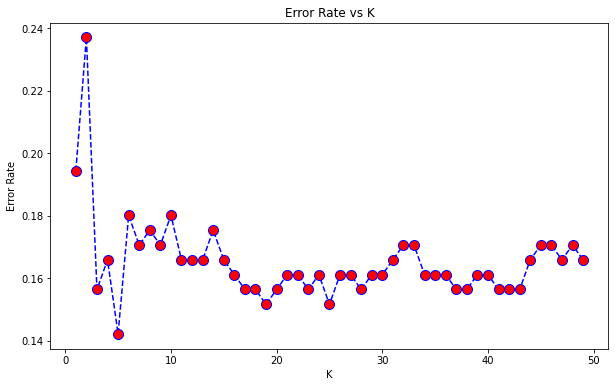

In [37]:
plt.figure(figsize = (10,6))
plt.plot(range(1,50),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
error = {'K':range(1,50),
        'Error rate': error_rate}
  
error_rate_df = pd.DataFrame(error)

In [39]:
print(f"The K value with smallest error rate is: {error_rate_df[error_rate_df['Error rate'] == min(error_rate_df['Error rate'])]['K'].values} with an error rate of {min(error_rate_df['Error rate'])}")

The K value with smallest error rate is: [5] with an error rate of 0.14218009478672985


In [40]:
pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8341232227488151


In [41]:
knn_model(5)

When k = 5:
Accuracy = 85.78%
Sensitivity = 82.08%
Specificity = 89.52%
Precision = 88.78%
                  No Heart Disease  Heart Disease
No Heart Disease                94             11
Heart Disease                   19             87


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.90      0.75      0.82       106

    accuracy                           0.83       211
   macro avg       0.84      0.83      0.83       211
weighted avg       0.84      0.83      0.83       211



In [43]:
def RFC(n):
    forest= RandomForestClassifier(n_estimators = n, random_state = 0)
    forest.fit(X_train,y_train)  
    y_pred = forest.predict(X_test)
    print(f"When estimators = {n}:")
    cmat = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cmat, columns = ['No Heart Disease', 'Heart Disease'], index=['No Heart Disease', 'Heart Disease'])
    TN =cm_df.iloc[0, 0]
    FP = cm_df.iloc[0, 1]
    FN = cm_df.iloc[1, 0]
    TP = cm_df.iloc[1, 1]
    accuracy = round((TP + TN) / (TP + FP + TN + FN) * 100, 2)
    sensitivity = round(TP / (TP + FN) * 100, 2)
    specificity = round(TN / (TN + FP) * 100, 2)
    precision = round(TP / (TP + FP) * 100, 2)
    print(f"Accuracy = {accuracy}%")
    print(f"Sensitivity = {sensitivity}%")
    print(f"Specificity = {specificity}%")
    print(f"Precision = {precision}%")
    print(cm_df)
    fig = px.imshow(cm_df,
                labels=dict(x="Predicted label ", y="True lable"),
                x=['No Heart Disease', 'Heart Disease'],
                y=['No Heart Disease', 'Heart Disease']
               )
    fig.update_layout(
    title=f'The confusion matrix for {n} estimators is:',
    width=800,
    height=600,
    )
    fig.show()

Choose a n_estimator value by examining accuracy scores using different n values 

Text(0, 0.5, 'Error Rate for Random Forest Classifier')

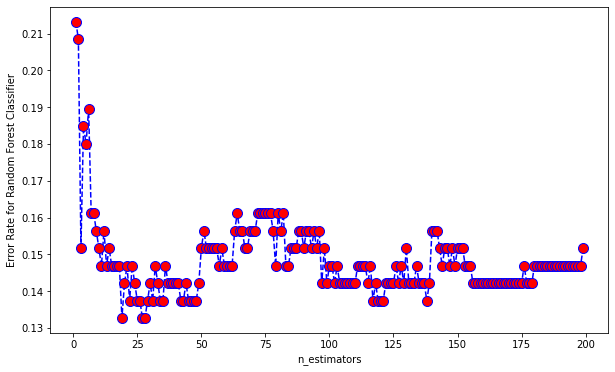

In [44]:
error_rate_rfc =[]
for n in range(1, 200):
    forest = RandomForestClassifier(n_estimators=n, random_state = 0)
    forest.fit(X_train, y_train)
    pred_i = forest.predict(X_test)
    #scores.append(accuracy_score(y_test, pred_i))
    error_rate_rfc.append(np.mean(pred_i != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1, 200), error_rate_rfc, color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.xlabel('n_estimators')
# plt.ylabel('Testing Accuracy')
plt.ylabel('Error Rate for Random Forest Classifier')

In [45]:
result = {'n':range(1,200),
        'Error rate': error_rate_rfc}
  
error_rate_rfc_df = pd.DataFrame(result)

In [46]:
print(f"The n_estimator with highest score is: {error_rate_rfc_df[error_rate_rfc_df['Error rate'] == min(error_rate_rfc_df['Error rate'])]['n'].values} with an score of {min(error_rate_rfc_df['Error rate'])}")

The n_estimator with highest score is: [19 27 28] with an score of 0.13270142180094788


In [47]:
y_pred = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8483412322274881


In [48]:
RFC(19)

When estimators = 19:
Accuracy = 86.73%
Sensitivity = 85.85%
Specificity = 87.62%
Precision = 87.5%
                  No Heart Disease  Heart Disease
No Heart Disease                92             13
Heart Disease                   15             91


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.86      0.83      0.85       106

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211

